In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.notebook import tqdm
import scprep
import phate

In [2]:

nas_path = "./dataset_1401/"
lineage_label = np.array(pd.read_csv('./dataset_1401/1404_lineage_report and metadata 20220316.csv')[['lineage_x','diff']])
label_ = []
new_lineage_label = []
for idx, rna in enumerate(SeqIO.parse('./dataset_1401/1404.sequences.aln.fasta',"fasta")):
    if "B.1.617.2" == lineage_label[idx][0]:
    # break
    # print(lineage_label[idx][0].split(' ')[0])
        label_.append(lineage_label[idx][1].split(' ')[0])

        new_lineage_label.append(str(rna.seq))

In [3]:
class_,_ ,_,_= np.unique(label_,return_counts=True,return_index=True,return_inverse=True)

In [4]:
# # only tcga rna unit
def clean(x):
	x = x.upper() 
	
	if x == 'T' or x == 'A' or x == 'G' or x == 'C' or x == '-' or x == 'N':
		return x

	if x == 'U' or x == 'Y':
		return 'T'
	
	if x == 'K' or x == 'S':
		return 'G'

	if x == 'M' or x == 'R' or x == 'W' or x == 'H' or x=='V' or x=='D':
		return 'A'

	if x== 'B':
		return 'C'
from itertools import product
dict_search = {}
for idx, i in enumerate('-NACGT'):

    dict_search[i] = idx
print(dict_search)
from tqdm.notebook import tqdm
num_new_sequences =[]
for k in tqdm(new_lineage_label):
	temp_store=[]
	for j in k:
		temp_store.append(dict_search[clean(j)])
	num_new_sequences.append(temp_store)
total_sequence_array = np.array(num_new_sequences)
print(total_sequence_array.shape)

{'-': 0, 'N': 1, 'A': 2, 'C': 3, 'G': 4, 'T': 5}


  0%|          | 0/1135 [00:00<?, ?it/s]

(1135, 29903)


In [5]:
class_dict_ = {}
for idx, i in enumerate(class_):
    class_dict_[i] = idx
print(class_dict_)
multi_label = []
for i in label_:
    multi_label.append(class_dict_[i])

{'N': 0, 'Y': 1}


In [6]:
print(label_[0:20])
print(multi_label[0:20])

['Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y']
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]


In [7]:
len(total_sequence_array[0][0:265])

265

In [8]:
search_dict = {(266,21555): ['ORF1ab',], 
                              (21563, 25384): ['S',], 
                              (25393, 26220): ['ORF3a',], 
                              (26245, 26472): ['E',], 
                              (26523, 27191): ['M',], 
                              (27202, 27387): ['ORF6',],
                              (27394, 27759): ['ORF7a',], 
                              (27756, 27887): ['ORF7b',], 
                              (27894, 28259): ['ORF8',],
                              (28274, 29533): ['N',], 
                              (29558, 29674): ['ORF10',]}

In [9]:
gene_region_dict = {}
for next_gene in search_dict:
    gene_region_dict[search_dict[next_gene][0]]=[]

for gets, next_gene in zip(gene_region_dict, search_dict):
    for i in range(len(total_sequence_array)):
        gene_region_dict[gets].append(total_sequence_array[i][next_gene[0]-1:next_gene[1]])
        # print(total_sequence_array[i][next_gene[0]-1:next_gene[1]])

In [10]:
import matplotlib.pyplot as plt
save_matrix_fuc = {i:None for i in gene_region_dict.keys()}
for i in save_matrix_fuc:
    # save_matrix_fuc[i] = phate.PHATE(n_jobs=-2).fit_transform(np.array(gene_region_dict[i]))
    save_matrix_fuc[i] = (phate.PHATE(n_jobs=-2).set_params(gamma=1, t=1000)).fit_transform(np.array(gene_region_dict[i]))
# phate_op = phate.PHATE(n_jobs=-2)
# data_phate = phate_op.fit_transform(np.array(gene_region_dict['ORF10']))

Calculating PHATE...
  Running PHATE on 1135 observations and 21290 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 165 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.34 seconds.
  Calculated graph and diffusion operator in 4.72 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated diffusion potential in 0.96 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.72 seconds.
Calculated PHATE in 7.70 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 3822 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.26 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.18 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 4200 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.29 seconds.
  Calculated graph and diffusion operator in 1.75 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated diffusion potential in 0.84 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 8.89 seconds.
Calculated PHATE in 11.49 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 828 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.41 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.20 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 12639 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.57 seconds.
  Calculated graph and diffusion operator in 1.21 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


  Calculated diffusion potential in 0.65 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 43.48 seconds.
Calculated PHATE in 45.36 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 228 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 19024 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.52 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated diffusion potential in 0.66 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 1.85 seconds.
Calculated PHATE in 3.60 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 669 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 16098 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.46 seconds.
  Calculated graph and diffusion operator in 1.30 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


  Calculated diffusion potential in 0.63 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 29.39 seconds.
Calculated PHATE in 31.34 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 186 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.36 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 18287 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.55 seconds.
  Calculated graph and diffusion operator in 1.12 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


  Calculated diffusion potential in 0.64 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 1.92 seconds.
Calculated PHATE in 3.69 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 366 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.30 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.21 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 15546 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.44 seconds.
  Calculated graph and diffusion operator in 1.00 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated diffusion potential in 0.71 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 11.52 seconds.
Calculated PHATE in 13.25 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 132 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.20 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 18854 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.62 seconds.
  Calculated graph and diffusion operator in 1.04 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated diffusion potential in 0.70 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 9.54 seconds.
Calculated PHATE in 11.30 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 366 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.42 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.19 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 16752 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.49 seconds.
  Calculated graph and diffusion operator in 1.11 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


  Calculated diffusion potential in 0.78 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 33.34 seconds.
Calculated PHATE in 35.24 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 1260 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.17 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 11806 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.42 seconds.
  Calculated graph and diffusion operator in 1.44 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


  Calculated diffusion potential in 0.84 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 27.95 seconds.
Calculated PHATE in 30.24 seconds.
Calculating PHATE...
  Running PHATE on 1135 observations and 117 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.21 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.18 seconds.
    Calculating affinities...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 18451 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 0.51 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Calculating diffusion potential...


/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated diffusion potential in 0.88 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 84.81 seconds.
Calculated PHATE in 86.68 seconds.


In [11]:
len(gene_region_dict.keys())

11

In [12]:
yn_label = ['N' if i==0 else 'Y' for i in multi_label]

/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  if __name__ == '__main__':
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  if __name__ == '__main__':
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  if __name__ == '__main__':
/home/john/anaconda3/envs/phate/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated si

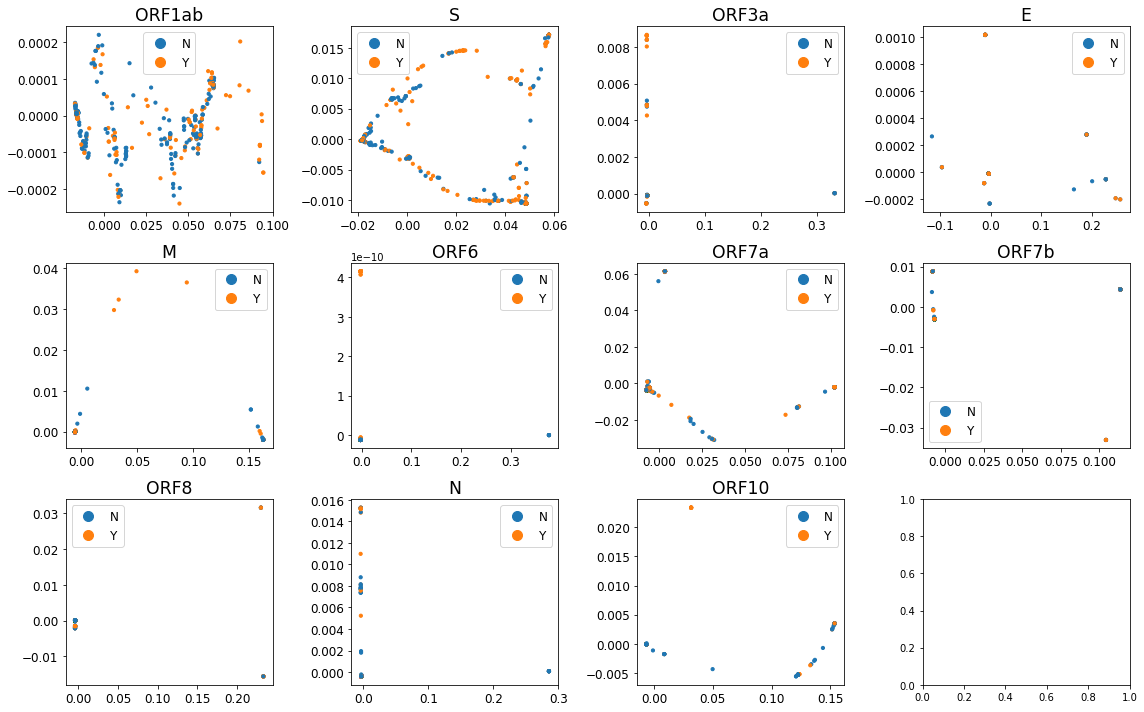

In [13]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3,4, figsize=(16,10))
[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12] = axes.ravel()

#plotting PCA
for ax_i, matrix_keys in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12], save_matrix_fuc):
    phate.plot.scatter2d(save_matrix_fuc[matrix_keys], s=10, 
                        c=yn_label, title=matrix_keys, 
                        legend=True, ax=ax_i)
plt.tight_layout()
plt.show()